# Part 1: Data Loading & Preparation

**Fun Fact:**

- The show literally killed off its darlings one by. One, from would-be protagonists to pregnant women, to young children, making it impossible for Thrones fans to figure out where the show would go next. No characters are ever truly safe on the Game of Thrones. (LOL)
- Characters in the Game of Thrones TV series are more likely to die if they do not switch allegiance, and are male, according to an article published in the open access journal *Injury Epidemiology*.

In [1]:
# importing libraries
import pandas            as pd                       # data science essentials
import numpy as np
import matplotlib.pyplot as plt                      # data visualization
import seaborn           as sns                      # enhanced data viz
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.impute import KNNImputer                 # KNN for Missing Values
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots
import gender_guesser.detector as gender            # guess gender based on (given) name

# loading data    
file = "./dataset/GOT_character_predictions.xlsx"

#reading the excel fiile
got = pd.read_excel(io = file)


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)


# displaying the head of the dataset
got.head(n = 15)


,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
0,1,Viserys II Targaryen,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
5,6,Tommen Baratheon,NaN,NaN,NaN,Cersei Lannister,Robert Baratheon,Myrcella Baratheon,NaN,NaN,0,0,0,0,0,1.0,1.0,1.0,NaN,0,0,NaN,5,1.000000,1
6,7,Valarr Targaryen,Hand of the King,Valyrian,183.0,NaN,NaN,NaN,House Targaryen,Kiera of Tyrosh,0,0,0,0,0,NaN,NaN,NaN,1.0,1,1,26.0,0,0.431438,0
7,8,Viserys I Targaryen,NaN,NaN,NaN,Alyssa Targaryen,Baelon Targaryen,Rhaenyra Targaryen,NaN,NaN,0,0,0,0,0,1.0,1.0,1.0,NaN,0,0,NaN,5,0.678930,0
8,9,Wilbert,Ser,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1,0,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.006689,0
9,10,Wilbert Osgrey,Ser,NaN,NaN,NaN,NaN,NaN,House Osgrey,NaN,0,0,0,0,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.020067,1


In [3]:
# checking each feature for missing values
got.isnull().sum(axis = 0)

S.No                             0
name                             0
title                            0
culture                       1269
dateOfBirth                   1513
mother                        1925
father                        1920
heir                          1923
house                          427
spouse                        1670
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveMother                 1925
isAliveFather                 1920
isAliveHeir                   1923
isAliveSpouse                 1670
isMarried                        0
isNoble                          0
age                           1513
numDeadRelations                 0
popularity                       0
isAlive                          0
dtype: int64

In [4]:
#printing the info of the dataset
got.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   S.No                        1946 non-null   int64  
 1   name                        1946 non-null   object 
 2   title                       1946 non-null   object 
 3   culture                     677 non-null    object 
 4   dateOfBirth                 433 non-null    float64
 5   mother                      21 non-null     object 
 6   father                      26 non-null     object 
 7   heir                        23 non-null     object 
 8   house                       1519 non-null   object 
 9   spouse                      276 non-null    object 
 10  book1_A_Game_Of_Thrones     1946 non-null   int64  
 11  book2_A_Clash_Of_Kings      1946 non-null   int64  
 12  book3_A_Storm_Of_Swords     1946 non-null   int64  
 13  book4_A_Feast_For_Crows     1946 

In [5]:
#converting object into string datatypes
got['title'] = got['title'].astype(str)
got['name'] = got['name'].astype(str)

In [6]:
# user-defined functions

#########################
# mv_flagger
#########################
def mv_flagger(df):
    """
Flags all columns that have missing values with 'm-COLUMN_NAME'.

PARAMETERS
----------
df : DataFrame to flag missing values


RETURNS
-------
DataFrame with missing value flags."""


    for col in df:

        if df[col].isnull().astype(int).sum() > 0:
            df['m_'+col] = df[col].isnull().astype(int)
            
    return df



#########################
# text_split_feature
#########################
def text_split_feature(col, df, sep=' ', new_col_name='number_of_names'):
    """
Splits values in a string Series (as part of a DataFrame) and sums the number
of resulting items. Automatically appends summed column to original DataFrame.

PARAMETERS
----------
col          : column to split
df           : DataFrame where column is located
sep          : string sequence to split by, default ' '
new_col_name : name of new column after summing split, default
               'number_of_names'
"""
    
    df[new_col_name] = 0
    
    
    for index, val in df.iterrows():
        df.loc[index, new_col_name] = len(df.loc[index, col].split(sep = ' '))

In [7]:
# running the mv_flagger function
got = mv_flagger(df = got)


# checking results
got.columns

Index(['S.No', 'name', 'title', 'culture', 'dateOfBirth', 'mother', 'father', 'heir', 'house', 'spouse', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity', 'isAlive', 'm_culture', 'm_dateOfBirth', 'm_mother', 'm_father', 'm_heir', 'm_house', 'm_spouse', 'm_isAliveMother', 'm_isAliveFather', 'm_isAliveHeir', 'm_isAliveSpouse', 'm_age'], dtype='object')

In [8]:
#checking for the result and flagged values
got.head(n = 5)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,m_culture,m_dateOfBirth,m_mother,m_father,m_heir,m_house,m_spouse,m_isAliveMother,m_isAliveFather,m_isAliveHeir,m_isAliveSpouse,m_age
0,1,Viserys II Targaryen,nan,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,0,0,0,0,0,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0,1,1,0,0,0,1,1,0,0,0,1,1
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,1,1,1,1,1,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1,0,0,1,1,1,0,0,1,1,1,0,0
2,3,Addison Hill,Ser,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,0,0,0,1,0,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1,1,1,1,1,1,0,1,1,1,1,1,1
3,4,Aemma Arryn,Queen,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,0,0,0,0,0,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0,1,0,1,1,1,0,0,1,1,1,0,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,0,0,0,1,0,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1,0,0,1,1,1,0,0,1,1,1,0,0


In [9]:
#pulling up data dictionary
got_description =pd.read_excel("./documentation/GOT_data_dictionary.xlsx")


# displaying the data dictionary
got_description


,S.No,Character number (by order of appearance)
0,name,Character name
1,title,Honorary title(s) given to each character
2,male,"1 = male, 0 = female"
3,culture,Indicates the cultural group of a character
4,dateOfBirth,Known dates of birth for each character (measurement unknown)
5,mother,Character's biological mother
6,father,Character's biological father
7,heir,Character's biological heir
8,house,Indicates a character's allegiance to a house (i.e. a powerful family)
9,spouse,Character's spouse(s)


# Part 2: Feature Engineering

Initially, the idea for the selection of variables and feature enginereering
is to make use of the name and title to identify the gender using the for loops
and nested if condition. For male title, ser as such. However, throughout the 
development of the model the gender does not have any huge correlation on the
y-variable.



In [10]:
# analyzing features for missing value imputation and categorical encoding
# First Step
    # name - can drop after imputation
    # title - create a for loop and nested condition
    # male - create column and use gender_guesser

#Second Step - fill in the missing value with median
#age
#dateOfBirth

# title - missing - categorical value
# culture - missing - categorical value fill uknown 
# male - creating a new column for imputing the missing data with name using gender guess. 
# dateOfBirth - missing - can drop after imputation

# mother - missing - input Unknown - can drop after imputation 
# father - missing - input Unknown - can drop after imputation 
# heir - missing - input Unknown - can drop after imputation 
# house - missing - input Unknown - can drop after imputation
# spouse - missing - input Unknown - can drop after imputation


# Missing Values
# isAliveMother - missing  - imputing the with mother 
# isAliveFather - missing  - imputing the with father
# isAliveHeir - missing - imputing the with heir
# isAliveSpouse - missing - - imputing the with Spouse
# age - missing - is a mom/dad/heir/female/male/spouse

#No Need for Feature Engineering
# Book 1 - 
# Book 2 - 
# Book 3 - 
# Book 4 - 
# Book 5 - 
# isMarried - 
# isNoble - 
# numDeadRelations -
# popularity - 

In [11]:
# checking each feature for missing values
got.isnull().sum(axis = 0)

S.No                             0
name                             0
title                            0
culture                       1269
dateOfBirth                   1513
mother                        1925
father                        1920
heir                          1923
house                          427
spouse                        1670
book1_A_Game_Of_Thrones          0
book2_A_Clash_Of_Kings           0
book3_A_Storm_Of_Swords          0
book4_A_Feast_For_Crows          0
book5_A_Dance_with_Dragons       0
isAliveMother                 1925
isAliveFather                 1920
isAliveHeir                   1923
isAliveSpouse                 1670
isMarried                        0
isNoble                          0
age                           1513
numDeadRelations                 0
popularity                       0
isAlive                          0
m_culture                        0
m_dateOfBirth                    0
m_mother                         0
m_father            

# Imputing Missing Values for Age with Median and Creating Dummy Variables

In [12]:
#checking the values of dateOfbirth and age to see correlation
got[['age', 'dateOfBirth']].value_counts(normalize = False,
                      sort = False,
                      ascending = False)

age        dateOfBirth
-298001.0   298299.0       1
-277980.0   278279.0       1
 0.0        105.0          1
            248.0          1
 1.0        298.0          1
 2.0        281.0          1
 3.0        127.0          1
            280.0          1
 5.0        295.0          1
            300.0          1
 6.0        123.0          1
            299.0          5
 7.0        298.0          1
 8.0        297.0          2
 9.0        290.0          1
            291.0          1
            296.0          6
 10.0       123.0          1
            295.0          6
 11.0       294.0          7
 12.0       184.0          2
            264.0          1
            293.0          6
 13.0       183.0          1
            236.0          1
            285.0          1
            286.0          1
            292.0          4
 14.0       275.0          1
            285.0          2
            291.0          4
 15.0       99.0           1
            274.0          1
            284.0   

In [13]:
# soft coding MEDIAN for age and dateOfBirth
age_median = got['age'].median()
dob_median = got['dateOfBirth'].median()


# filling age NAs with MEDIAN
got['age'].fillna(value = age_median,
                         inplace = True)
# filling dateOfBirth NAs with MEDIAN

got['dateOfBirth'].fillna(value = dob_median,
                         inplace = True)


# checking to make sure NAs are filled in
print(got[['age', 'dateOfBirth']].isnull().any())
    

age            False
dateOfBirth    False
dtype: bool


In [14]:
# running the mv_flagger function
got = mv_flagger(df = got)


# checking results
got.columns


#checking for missing values
got.isnull().any()

S.No                          False
name                          False
title                         False
culture                        True
dateOfBirth                   False
mother                         True
father                         True
heir                           True
house                          True
spouse                         True
book1_A_Game_Of_Thrones       False
book2_A_Clash_Of_Kings        False
book3_A_Storm_Of_Swords       False
book4_A_Feast_For_Crows       False
book5_A_Dance_with_Dragons    False
isAliveMother                  True
isAliveFather                  True
isAliveHeir                    True
isAliveSpouse                  True
isMarried                     False
isNoble                       False
age                           False
numDeadRelations              False
popularity                    False
isAlive                       False
m_culture                     False
m_dateOfBirth                 False
m_mother                    

In [15]:
#strategy for categorical values
#imputing missing values of the categorical values with Unknown
got['mother'] = got['mother'].fillna('Unknown')
got['father'] = got['father'].fillna('Unknown')
got['spouse'] = got['spouse'].fillna('Unknown')
got['heir'] = got['heir'].fillna('Unknown')



# checking results
got[['mother','father','spouse','heir']].isnull().sum(axis = 0)

mother    0
father    0
spouse    0
heir      0
dtype: int64

In [16]:
# placeholder for 'mother' feature
# if mother is not unknown = isAliveMother is 1

got['isAliveMother'] = 1

# imputing values based on a condition
# if Unknown is 0
for index, val in got.iterrows():
    if got.loc[index, 'mother'] == 'Unknown':
        got.loc[index, 'isAliveMother'] = 0
# placeholder for 'father' feature
# if father is not unknown = isAliveFather is 1
got['isAliveFather'] = 1

# imputing values based on a condition
# if Unknown is 0
for index, val in got.iterrows():
    if got.loc[index, 'father'] == 'Unknown':
        got.loc[index, 'isAliveFather'] = 0

# placeholder for 'spouse' feature
# if spouse is not unknown = isAliveSpouse is 1
got['isAliveSpouse'] = 1


# imputing values based on a condition
# if Unknown is 0
for index, val in got.iterrows():
    if got.loc[index, 'spouse'] == 'Unknown':
        got.loc[index, 'isAliveSpouse'] = 0
# placeholder for 'heir' feature
# if spouse is not unknown = isAliveSpouse is 1
got['isAliveHeir'] = 1

# replacing values based on a condition
for index, val in got.iterrows():
    if got.loc[index, 'heir'] == 'Unknown':
        got.loc[index, 'isAliveHeir'] = 0
        
#to check for missing values
got.isnull().any()

S.No                          False
name                          False
title                         False
culture                        True
dateOfBirth                   False
mother                        False
father                        False
heir                          False
house                          True
spouse                        False
book1_A_Game_Of_Thrones       False
book2_A_Clash_Of_Kings        False
book3_A_Storm_Of_Swords       False
book4_A_Feast_For_Crows       False
book5_A_Dance_with_Dragons    False
isAliveMother                 False
isAliveFather                 False
isAliveHeir                   False
isAliveSpouse                 False
isMarried                     False
isNoble                       False
age                           False
numDeadRelations              False
popularity                    False
isAlive                       False
m_culture                     False
m_dateOfBirth                 False
m_mother                    

In [17]:
#Checking the result whether for loops
got.head(n = 5)

,S.No,name,title,culture,dateOfBirth,mother,father,heir,house,spouse,book1_A_Game_Of_Thrones,book2_A_Clash_Of_Kings,book3_A_Storm_Of_Swords,book4_A_Feast_For_Crows,book5_A_Dance_with_Dragons,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,m_culture,m_dateOfBirth,m_mother,m_father,m_heir,m_house,m_spouse,m_isAliveMother,m_isAliveFather,m_isAliveHeir,m_isAliveSpouse,m_age
0,1,Viserys II Targaryen,nan,NaN,268.0,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,Unknown,0,0,0,0,0,1,1,1,0,0,0,27.0,11,0.605351,0,1,1,0,0,0,1,1,0,0,0,1,1
1,2,Walder Frey,Lord of the Crossing,Rivermen,208.0,Unknown,Unknown,Unknown,House Frey,Perra Royce,1,1,1,1,1,0,0,0,1,1,1,97.0,1,0.896321,1,0,0,1,1,1,0,0,1,1,1,0,0
2,3,Addison Hill,Ser,NaN,268.0,Unknown,Unknown,Unknown,House Swyft,Unknown,0,0,0,1,0,0,0,0,0,0,1,27.0,0,0.267559,1,1,1,1,1,1,0,1,1,1,1,1,1
3,4,Aemma Arryn,Queen,NaN,82.0,Unknown,Unknown,Unknown,House Arryn,Viserys I Targaryen,0,0,0,0,0,0,0,0,1,1,1,23.0,0,0.183946,0,1,0,1,1,1,0,0,1,1,1,0,0
4,5,Sylva Santagar,Greenstone,Dornish,276.0,Unknown,Unknown,Unknown,House Santagar,Eldon Estermont,0,0,0,1,0,0,0,0,1,1,1,29.0,0,0.043478,1,0,0,1,1,1,0,0,1,1,1,0,0


In [18]:
# looping to make the column names
for val in got:
    print(f"'{val}', ")

'S.No', 
'name', 
'title', 
'culture', 
'dateOfBirth', 
'mother', 
'father', 
'heir', 
'house', 
'spouse', 
'book1_A_Game_Of_Thrones', 
'book2_A_Clash_Of_Kings', 
'book3_A_Storm_Of_Swords', 
'book4_A_Feast_For_Crows', 
'book5_A_Dance_with_Dragons', 
'isAliveMother', 
'isAliveFather', 
'isAliveHeir', 
'isAliveSpouse', 
'isMarried', 
'isNoble', 
'age', 
'numDeadRelations', 
'popularity', 
'isAlive', 
'm_culture', 
'm_dateOfBirth', 
'm_mother', 
'm_father', 
'm_heir', 
'm_house', 
'm_spouse', 
'm_isAliveMother', 
'm_isAliveFather', 
'm_isAliveHeir', 
'm_isAliveSpouse', 
'm_age', 


In [19]:
#dropping categorical values and repetitive values
got = got.drop(['S.No','name','title','culture','mother',
                'father','heir','house','spouse','m_isAliveMother',
                'm_isAliveFather','m_isAliveHeir','m_isAliveSpouse',
                'm_mother','m_father','m_heir','m_spouse'], axis = 1)


In [20]:
#checking for the columns and dropped variables
got.columns

Index(['dateOfBirth', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isAliveMother', 'isAliveFather', 'isAliveHeir', 'isAliveSpouse', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity', 'isAlive', 'm_culture', 'm_dateOfBirth', 'm_house', 'm_age'], dtype='object')

In [21]:
#making sure there are no more missing value
got.isnull().any()

dateOfBirth                   False
book1_A_Game_Of_Thrones       False
book2_A_Clash_Of_Kings        False
book3_A_Storm_Of_Swords       False
book4_A_Feast_For_Crows       False
book5_A_Dance_with_Dragons    False
isAliveMother                 False
isAliveFather                 False
isAliveHeir                   False
isAliveSpouse                 False
isMarried                     False
isNoble                       False
age                           False
numDeadRelations              False
popularity                    False
isAlive                       False
m_culture                     False
m_dateOfBirth                 False
m_house                       False
m_age                         False
dtype: bool

# Part 3: Splitting the Data & Model Development

In [22]:
########################################
# optimal_neighbors
########################################
def optimal_neighbors(x_data,
                      y_data,
                      standardize = True,
                      pct_test=0.10,
                      seed=219,
                      response_type='reg',
                      max_neighbors=20,
                      show_viz=True):
    """
Exhaustively compute training and testing results for KNN across
[1, max_neighbors]. Outputs the maximum test score and (by default) a
visualization of the results.
PARAMETERS
----------
x_data        : explanatory variable data
y_data        : response variable
standardize   : whether or not to standardize the x data, default True
pct_test      : test size for training and validation from (0,1), default 0.25
seed          : random seed to be used in algorithm, default 219
response_type : type of neighbors algorithm to use, default 'reg'
    Use 'reg' for regression (KNeighborsRegressor)
    Use 'class' for classification (KNeighborsClassifier)
max_neighbors : maximum number of neighbors in exhaustive search, default 20
show_viz      : display or surpress k-neigbors visualization, default True
"""    
    
    
    if standardize == True:
        # optionally standardizing x_data
        scaler             = StandardScaler()
        scaler.fit(x_data)
        x_scaled           = scaler.transform(x_data)
        x_scaled_df        = pd.DataFrame(x_scaled)
        x_data             = x_scaled_df



    # train-test split
    x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                        y_data,
                                                        test_size = pct_test,
                                                        random_state = seed)


    # creating lists for training set accuracy and test set accuracy
    training_accuracy = []
    test_accuracy = []
    
    
    # setting neighbor range
    neighbors_settings = range(1, max_neighbors + 1)


    for n_neighbors in neighbors_settings:
        # building the model based on response variable type
        if response_type == 'reg':
            clf = KNeighborsRegressor(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)
            
        elif response_type == 'class':
            clf = KNeighborsClassifier(n_neighbors = n_neighbors)
            clf.fit(x_train, y_train)            
            
        else:
            print("Error: response_type must be 'reg' or 'class'")
        
        
        # recording the training set accuracy
        training_accuracy.append(clf.score(x_train, y_train))
    
        # recording the generalization accuracy
        test_accuracy.append(clf.score(x_test, y_test))


    # optionally displaying visualization
    if show_viz == True:
        # plotting the visualization
        fig, ax = plt.subplots(figsize=(12,8))
        plt.plot(neighbors_settings, training_accuracy, label = "training accuracy")
        plt.plot(neighbors_settings, test_accuracy, label = "test accuracy")
        plt.ylabel("Accuracy")
        plt.xlabel("n_neighbors")
        plt.legend()
        plt.show()
    
    
    # returning optimal number of neighbors
    print(f"The optimal number of neighbors is: {test_accuracy.index(max(test_accuracy))+1}")
    return test_accuracy.index(max(test_accuracy))+1


########################################
# visual_cm
########################################
def visual_cm(true_y, pred_y, labels = None):
    """
Creates a visualization of a confusion matrix.

PARAMETERS
----------
true_y : true values for the response variable
pred_y : predicted values for the response variable
labels : , default None
    """
    # visualizing the confusion matrix

    # setting labels
    lbls = labels
    

    # declaring a confusion matrix object
    cm = confusion_matrix(y_true = true_y,
                          y_pred = pred_y)


    # heatmap
    sns.heatmap(cm,
                annot       = True,
                xticklabels = lbls,
                yticklabels = lbls,
                cmap        = 'Blues',
                fmt         = 'g')


    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix of the Classifier')
    plt.show()

 Choosing the response variable (y-variable): 
 The objective of the GOT dataset is to predict the accuracy either of the following:
 1. How likely a character is alive and not alive in the next series? or
 2. How accurate is the prediction of a character being alive or not alive?

In [24]:
#Checking the correlation of the features
df_corr = got.corr(method = 'pearson').round(decimals = 2)

df_corr['isAlive'].sort_values(ascending = False)

isAlive                       1.00
book4_A_Feast_For_Crows       0.27
m_age                         0.15
m_dateOfBirth                 0.15
age                           0.05
m_house                       0.04
m_culture                     0.04
book5_A_Dance_with_Dragons    0.03
book3_A_Storm_Of_Swords       0.01
isNoble                      -0.04
dateOfBirth                  -0.05
isAliveSpouse                -0.05
isMarried                    -0.05
book2_A_Clash_Of_Kings       -0.07
isAliveHeir                  -0.13
isAliveFather                -0.14
isAliveMother                -0.14
book1_A_Game_Of_Thrones      -0.15
popularity                   -0.18
numDeadRelations             -0.19
Name: isAlive, dtype: float64

In [25]:
#checking the numbers of one and zero in the response variable
got.loc[ : ,'isAlive'].value_counts(normalize = True).round(decimals = 2)

1    0.75
0    0.25
Name: isAlive, dtype: float64

In [26]:
# declaring explanatory variables
got_data = got.drop('isAlive', axis = 1)


# declaring response variable
got_target = got.loc[:, 'isAlive']

In [27]:
# train-test split with stratification
x_test, x_train, y_test, y_train = train_test_split(
            got_data,
            got_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = got_target) # preserving balance


# merging training data for statsmodels
got_train = pd.concat([x_train, y_train], axis = 1)

In [28]:
print(f"""

Response Variable Proportions (Training Set)
--------------------------------------------
{y_train.value_counts(normalize = True).round(decimals = 2)}



Response Variable Proportions (Testing Set)
--------------------------------------------
{y_test.value_counts(normalize = True).round(decimals = 2)}
""")





Response Variable Proportions (Training Set)
--------------------------------------------
1    0.74
0    0.26
Name: isAlive, dtype: float64



Response Variable Proportions (Testing Set)
--------------------------------------------
1    0.75
0    0.25
Name: isAlive, dtype: float64



In [29]:
# looping to make x-variables suitable for statsmodels
for val in got:
    print(f"{val} +")

dateOfBirth +
book1_A_Game_Of_Thrones +
book2_A_Clash_Of_Kings +
book3_A_Storm_Of_Swords +
book4_A_Feast_For_Crows +
book5_A_Dance_with_Dragons +
isAliveMother +
isAliveFather +
isAliveHeir +
isAliveSpouse +
isMarried +
isNoble +
age +
numDeadRelations +
popularity +
isAlive +
m_culture +
m_dateOfBirth +
m_house +
m_age +


# Part 4: Model Development with Logistic Regressions

Trial 1

In [30]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula   = """isAlive ~ numDeadRelations  """,
                           data = got_train)


# FITTING the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.537808
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                         Results: Logit
=================================================================
Model:              Logit            Pseudo R-squared: 0.055     
Dependent Variable: isAlive          AIC:              213.7453  
Date:               2021-12-05 21:40 BIC:              220.2913  
No. Observations:   195              Log-Likelihood:   -104.87   
Df Model:           1                LL-Null:          -111.01   
Df Residuals:       193              LLR p-value:      0.00046044
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     5.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Intercept          1.2345   0.1768  6.9837 0.0000  0.8880  1.5810
numDeadRelations  -0.5098   0.1662 -3.0668 0.0022 -0.8357 -0.1840
=================================================================

"""

Trial 2 - Full Model - 19 explanatory variables

In [31]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula   = """isAlive ~ dateOfBirth +
                                                    book1_A_Game_Of_Thrones +
                                                    book2_A_Clash_Of_Kings +
                                                    book3_A_Storm_Of_Swords +
                                                    book4_A_Feast_For_Crows +
                                                    book5_A_Dance_with_Dragons +
                                                    isAliveMother +
                                                    isAliveFather +
                                                    isAliveSpouse +
                                                    isAliveHeir +
                                                    isMarried +
                                                    isNoble +
                                                    numDeadRelations +
                                                    popularity +
                                                    m_culture +
                                                    m_house  +
                                                    m_age""",
                                                    data = got_train)


# FITTING the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

         Current function value: 0.329569
         Iterations: 35


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary2.Summary'>
"""
                                                             Results: Logit
========================================================================================================================================
Model:                                       Logit                                   Pseudo R-squared:                        0.421     
Dependent Variable:                          isAlive                                 AIC:                                     158.5320  
Date:                                        2021-12-05 21:41                        BIC:                                     207.6270  
No. Observations:                            195                                     Log-Likelihood:                          -64.266   
Df Model:                                    14                                      LL-Null:                                 -111.01   
Df Residuals:                                180                                     LLR p-value:                             8.3087e-14
Converged:                                   0.0000                                  Scale:                                   1.0000    
No. Iterations:                              35.0000                                                                                    
----------------------------------------------------------------------------------------------------------------------------------------
                            Coef.             Std.Err.             z     P>|z|             [0.025                       0.975]          
----------------------------------------------------------------------------------------------------------------------------------------
Intercept                  -11.9883                      8.9126  -1.3451 0.1786                     -29.4566                      5.4801
dateOfBirth                  0.0461                         nan      nan    nan                          nan                         nan
book1_A_Game_Of_Thrones     -2.0428                      0.6234  -3.2770 0.0010                      -3.2646                     -0.8210
book2_A_Clash_Of_Kings       1.1417                      0.7711   1.4807 0.1387                      -0.3695                      2.6530
book3_A_Storm_Of_Swords     -1.4412                      0.6403  -2.2509 0.0244                      -2.6961                     -0.1863
book4_A_Feast_For_Crows      2.2531                      0.9178   2.4550 0.0141                       0.4543                      4.0519
book5_A_Dance_with_Dragons   0.8695                      0.5860   1.4837 0.1379                      -0.2791                      2.0180
isAliveMother               -8.5980                         nan      nan    nan                          nan                         nan
isAliveFather               -7.0399 1121527223036687679488.0000  -0.0000 1.0000 -2198152964833128218624.0000 2198152964833128218624.0000
isAliveSpouse                0.4215      18714451710788044.0000   0.0000 1.0000      -36679651343558568.0000      36679651343558568.0000
isAliveHeir                 -7.8189         51571237608653.7031  -0.0000 1.0000        -101077768351126.6094        101077768351110.9844
isMarried                    0.4215      18714451710788044.0000   0.0000 1.0000      -36679651343558568.0000      36679651343558568.0000
isNoble                     -0.1831                      0.4901  -0.3736 0.7087                      -1.1437                      0.7775
numDeadRelations            -0.1148                      0.0054 -21.2081 0.0000                      -0.1254                     -0.1042
popularity                  -1.4724                         nan      nan    nan                          nan                         nan
m_culture                    0.4056                      0.5370   0.7553 0.4501                      -0.6468                      1.4580
m_house                      1.0143    

Trial 3 - Removing all features with irrelevant variables

In [35]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula   = """isAlive ~ dateOfBirth +
                                                    book1_A_Game_Of_Thrones +
                                                    book2_A_Clash_Of_Kings +
                                                    book3_A_Storm_Of_Swords +
                                                    book4_A_Feast_For_Crows +
                                                    book5_A_Dance_with_Dragons +
                                                    isAliveMother +
                                                    age +
                                                    numDeadRelations +
                                                    popularity +
                                                    m_culture +
                                                    m_house +
                                                    m_age""",
                                                    data = got_train)


# FITTING the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

         Current function value: inf
         Iterations: 35


/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1810: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1863: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


LinAlgError: Singular matrix

In [33]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula   = """isAlive ~ dateOfBirth +
                                                    book1_A_Game_Of_Thrones +
                                                    book2_A_Clash_Of_Kings +
                                                    book3_A_Storm_Of_Swords +
                                                    book4_A_Feast_For_Crows +
                                                    book5_A_Dance_with_Dragons +
                                                    isMarried +
                                                    isNoble +
                                                    numDeadRelations +
                                                    popularity +
                                                    m_culture +
                                                    m_house +
                                                    m_dateOfBirth""",
                                                    data = got_train)


# FITTING the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.332775
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
============================================================================
Model:                   Logit               Pseudo R-squared:    0.415     
Dependent Variable:      isAlive             AIC:                 157.7824  
Date:                    2021-12-05 21:41    BIC:                 203.6044  
No. Observations:        195                 Log-Likelihood:      -64.891   
Df Model:                13                  LL-Null:             -111.01   
Df Residuals:            181                 LLR p-value:         5.2210e-14
Converged:               1.0000              Scale:               1.0000    
No. Iterations:          8.0000                                             
----------------------------------------------------------------------------
                            Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
----------------------------------------------------------------------------
Intercept                  -12.2863   4.9241 -2.4951 0.0126 -21.9373 -2.6353
dateOfBirth                  0.0477   0.0193  2.4718 0.0134   0.0099  0.0856
book1_A_Game_Of_Thrones     -1.9870   0.5713 -3.4781 0.0005  -3.1067 -0.8673
book2_A_Clash_Of_Kings       1.1273   0.6294  1.7910 0.0733  -0.1063  2.3610
book3_A_Storm_Of_Swords     -1.3819   0.6166 -2.2411 0.0250  -2.5904 -0.1733
book4_A_Feast_For_Crows      2.2248   0.6212  3.5814 0.0003   1.0073  3.4424
book5_A_Dance_with_Dragons   0.8875   0.5950  1.4916 0.1358  -0.2787  2.0537
isMarried                    0.9109   0.7179  1.2689 0.2045  -0.4961  2.3179
isNoble                     -0.1402   0.4911 -0.2856 0.7752  -1.1027  0.8223
numDeadRelations            -0.2594   0.2279 -1.1378 0.2552  -0.7061  0.1874
popularity                  -1.5296   1.7341 -0.8821 0.3777  -4.9284  1.8691
m_culture                    0.2767   0.4997  0.5537 0.5798  -0.7027  1.2561
m_house                      0.9111   0.6605  1.3793 0.1678  -0.3836  2.2057
m_dateOfBirth                0.2358   0.7675  0.3072 0.7587  -1.2685  1.7400
============================================================================

"""

In [37]:
# instantiating a logistic regression model object
logistic_small = smf.logit(formula   = """isAlive ~ dateOfBirth +
                                                    book1_A_Game_Of_Thrones +
                                                    book3_A_Storm_Of_Swords +
                                                    book4_A_Feast_For_Crows +
                                                    book5_A_Dance_with_Dragons +
                                                    isMarried +
                                                    numDeadRelations +
                                                    popularity +
                                                    m_house +
                                                    m_dateOfBirth""",
                                                    data = got_train)


# FITTING the model object
results_logistic = logistic_small.fit()


# checking the results SUMMARY
results_logistic.summary2() # summary2() has AIC and BIC

Optimization terminated successfully.
         Current function value: 0.342612
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                               Results: Logit
============================================================================
Model:                   Logit               Pseudo R-squared:    0.398     
Dependent Variable:      isAlive             AIC:                 155.6185  
Date:                    2021-12-05 21:42    BIC:                 191.6215  
No. Observations:        195                 Log-Likelihood:      -66.809   
Df Model:                10                  LL-Null:             -111.01   
Df Residuals:            184                 LLR p-value:         1.1132e-14
Converged:               1.0000              Scale:               1.0000    
No. Iterations:          8.0000                                             
----------------------------------------------------------------------------
                            Coef.   Std.Err.    z    P>|z|   [0.025   0.975]
----------------------------------------------------------------------------
Intercept                  -12.3540   4.4859 -2.7540 0.0059 -21.1461 -3.5619
dateOfBirth                  0.0500   0.0180  2.7793 0.0054   0.0148  0.0853
book1_A_Game_Of_Thrones     -1.6901   0.5264 -3.2109 0.0013  -2.7218 -0.6585
book3_A_Storm_Of_Swords     -1.0197   0.5860 -1.7401 0.0818  -2.1681  0.1288
book4_A_Feast_For_Crows      2.2184   0.6205  3.5755 0.0003   1.0023  3.4345
book5_A_Dance_with_Dragons   0.8917   0.6020  1.4812 0.1385  -0.2882  2.0715
isMarried                    0.9544   0.7035  1.3566 0.1749  -0.4245  2.3333
numDeadRelations            -0.2864   0.2276 -1.2582 0.2083  -0.7326  0.1598
popularity                  -1.5190   1.7012 -0.8929 0.3719  -4.8533  1.8153
m_house                      0.8548   0.6413  1.3330 0.1825  -0.4021  2.1117
m_dateOfBirth               -0.0599   0.7223 -0.0829 0.9339  -1.4755  1.3558
============================================================================

"""

# Part 5: Evaluating The Model

In [38]:
########################################
# explanatory variable sets
########################################
candidate_dict = {

 # full model 
    'logit_full'   : ['dateOfBirth','book1_A_Game_Of_Thrones','book2_A_Clash_Of_Kings',
                   'book3_A_Storm_Of_Swords','book4_A_Feast_For_Crows','book5_A_Dance_with_Dragons',
                   'isAliveMother','isAliveFather','isAliveSpouse','isAliveHeir',
                   'isMarried','isNoble','age','numDeadRelations','popularity'
                   ,'m_culture','m_house','m_dateOfBirth','m_age'],
    
 # half full
    'logit_half'   : ['dateOfBirth','book1_A_Game_Of_Thrones','book2_A_Clash_Of_Kings',
                   'book3_A_Storm_Of_Swords','book4_A_Feast_For_Crows','book5_A_Dance_with_Dragons',
                   'isMarried','isNoble','age','numDeadRelations','popularity'
                   ,'m_culture','m_house'],
 

 # significant variables only (set 1)
    'logit_sig'    : ['dateOfBirth','book1_A_Game_Of_Thrones',
                      'book3_A_Storm_Of_Swords','book4_A_Feast_For_Crows',
                      'book5_A_Dance_with_Dragons','isMarried','isNoble','age',
                      'numDeadRelations','popularity','m_age','m_house']


    
}



########################################
# checking previous model performances
########################################

In [39]:
# printing candidate variable sets
print(f"""
/--------------------------\\
|Explanatory Variable Sets |
\\--------------------------/

Full Model:
-----------
{candidate_dict['logit_full']}


Half Model Removing Irrelevant Variables:
--------------------------------
{candidate_dict['logit_half']}


First Significant p-value Model:
--------------------------------
{candidate_dict['logit_sig']}


""")


/--------------------------\
|Explanatory Variable Sets |
\--------------------------/

Full Model:
-----------
['dateOfBirth', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isAliveMother', 'isAliveFather', 'isAliveSpouse', 'isAliveHeir', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity', 'm_culture', 'm_house', 'm_dateOfBirth', 'm_age']


Half Model Removing Irrelevant Variables:
--------------------------------
['dateOfBirth', 'book1_A_Game_Of_Thrones', 'book2_A_Clash_Of_Kings', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isMarried', 'isNoble', 'age', 'numDeadRelations', 'popularity', 'm_culture', 'm_house']


First Significant p-value Model:
--------------------------------
['dateOfBirth', 'book1_A_Game_Of_Thrones', 'book3_A_Storm_Of_Swords', 'book4_A_Feast_For_Crows', 'book5_A_Dance_with_Dragons', 'isMarried', 'isNoble', 'age', 'numDead

# Trying out Standardization

In [40]:
# INSTANTIATING a StandardScaler() object
scaler = StandardScaler()


# FITTING the scaler with the data
scaler.fit(got_data)


# TRANSFORMING our data after fit
x_scaled = scaler.transform(got_data)


# converting scaled data into a DataFrame
x_scaled_df = pd.DataFrame(x_scaled)


# checking the results
x_scaled_df.describe().round(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.06,-0.50,-0.77,-0.96,-1.20,-0.81,-0.10,-0.12,-0.11,-0.41,-0.41,-0.92,-32.24,-0.22,-0.56,-1.37,-1.87,-0.53,-1.87
25%,-0.03,-0.50,-0.77,-0.96,-1.20,-0.81,-0.10,-0.12,-0.11,-0.41,-0.41,-0.92,0.03,-0.22,-0.47,-1.37,0.53,-0.53,0.53
50%,-0.03,-0.50,-0.77,-0.96,0.83,-0.81,-0.10,-0.12,-0.11,-0.41,-0.41,-0.92,0.03,-0.22,-0.35,0.73,0.53,-0.53,0.53
75%,-0.03,-0.50,1.29,1.04,0.83,1.24,-0.10,-0.12,-0.11,-0.41,-0.41,1.08,0.03,-0.22,-0.02,0.73,0.53,-0.53,0.53
max,32.24,2.01,1.29,1.04,0.83,1.24,9.57,8.59,9.14,2.46,2.46,1.08,0.04,10.62,5.67,0.73,0.53,1.89,0.53


In [41]:
# adding labels to the scaled DataFrame
x_scaled_df.columns = got_data.columns

#  Checking pre- and post-scaling of the data
print(f"""
Dataset BEFORE Scaling
----------------------
{np.var(got_data)}


Dataset AFTER Scaling
----------------------
{np.var(x_scaled_df)}
""")


Dataset BEFORE Scaling
----------------------
dateOfBirth                   8.527704e+07
book1_A_Game_Of_Thrones       1.590107e-01
book2_A_Clash_Of_Kings        2.342785e-01
book3_A_Storm_Of_Swords       2.496187e-01
book4_A_Feast_For_Crows       2.415390e-01
book5_A_Dance_with_Dragons    2.390106e-01
isAliveMother                 1.067491e-02
isAliveFather                 1.318223e-02
isAliveHeir                   1.167942e-02
isAliveSpouse                 1.217138e-01
isMarried                     1.217138e-01
isNoble                       2.484747e-01
age                           8.527281e+07
numDeadRelations              1.914222e+00
popularity                    2.576897e-02
m_culture                     2.268635e-01
m_dateOfBirth                 1.729980e-01
m_house                       1.712774e-01
m_age                         1.729980e-01
dtype: float64


Dataset AFTER Scaling
----------------------
dateOfBirth                   1.0
book1_A_Game_Of_Thrones       1.0
book2_

#Full Dataset for Logistic Regression

In [42]:
# train/test split with the full model
got_data   =  got.loc[ : , candidate_dict['logit_full']]
got_target =  got.loc[ : , 'isAlive']


# This is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = got_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('Full_Logreg Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('Full_Logreg Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))


# saving scoring data for future use
full_logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
full_logreg_test_score  = logreg_fit.score(x_test, y_test).round(4) # accuracy


# area under the roc curve (auc)
print('Full_ROC_AUC_SCORE:', roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
full_logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

Full_Logreg Training ACCURACY: 0.7796
Full_Logreg Testing  ACCURACY: 0.8308
Full_ROC_AUC_SCORE: 0.6897


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [45]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[ 20  30]
 [  3 142]]


In [46]:
# unpacking the confusion matrix
full_logreg_tn, \
full_logreg_fp, \
full_logreg_fn, \
full_logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_logreg_tn}
False Positives: {full_logreg_fp}
False Negatives: {full_logreg_fn}
True Positives : {full_logreg_tp}
""")


True Negatives : 20
False Positives: 30
False Negatives: 3
True Positives : 142



In [47]:
# INSTANTIATING a classification tree object
full_tree = DecisionTreeClassifier()


# FITTING the training data
full_tree_fit = full_tree.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pred = full_tree_fit.predict(x_test)


# SCORING the model
print('Full Tree Training ACCURACY:', full_tree_fit.score(x_train,
                                                     y_train).round(4))

print('Full Tree Testing ACCURACY :', full_tree_fit.score(x_test,
                                                     y_test).round(4))

print('Full Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = full_tree_pred).round(4))


# saving scoring data for future use
full_tree_train_score = full_tree_fit.score(x_train, y_train).round(4) # accuracy
full_tree_test_score  = full_tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
full_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = full_tree_pred).round(4) # auc

Full Tree Training ACCURACY: 0.96
Full Tree Testing ACCURACY : 0.8308
Full Tree AUC Score: 0.7879


In [48]:
# unpacking the confusion matrix
full_tree_tn, \
full_tree_fp, \
full_tree_fn, \
full_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_tree_tn}
False Positives: {full_tree_fp}
False Negatives: {full_tree_fn}
True Positives : {full_tree_tp}
""")


True Negatives : 35
False Positives: 15
False Negatives: 18
True Positives : 127



In [50]:
# INSTANTIATING a classification tree object
full_tree_pruned = DecisionTreeClassifier(max_depth = 8,
                    min_samples_leaf = 25,
                    random_state = 219)


# FITTING the training data
full_tree_pruned_fit = full_tree_pruned.fit(x_train, y_train)


# PREDICTING on new data
full_tree_pruned_pred = full_tree_pruned_fit.predict(x_test)


# SCORING the model
print('Full Training ACCURACY:', full_tree_pruned_fit.score(x_train, y_train).round(4))
print('Full Testing  ACCURACY:', full_tree_pruned_fit.score(x_test, y_test).round(4))
print('Full AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = full_tree_pruned_pred).round(4))


# saving scoring data for future use
full_pruned_tree_train_score = full_tree_pruned_fit.score(x_train, y_train).round(4) # accuracy
full_pruned_tree_test_score  = full_tree_pruned_fit.score(x_test, y_test).round(4) # accuracy


# saving auc score
full_pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = full_tree_pruned_pred).round(4) # auc

Full Training ACCURACY: 0.8281
Full Testing  ACCURACY: 0.8821
Full AUC Score        : 0.8093


In [51]:
# unpacking the confusion matrix
full_pruned_tree_tn, \
full_pruned_tree_fp, \
full_pruned_tree_fn, \
full_pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {full_pruned_tree_tn}
False Positives: {full_pruned_tree_fp}
False Negatives: {full_pruned_tree_fn}
True Positives : {full_pruned_tree_tp}
""")


True Negatives : 35
False Positives: 15
False Negatives: 18
True Positives : 127



Logistic Regression with Removing Irrelevant Variables

In [53]:
# train/test split with the full model
got_data   =  got.loc[ : , candidate_dict['logit_half']]
got_target =  got.loc[ : , 'isAlive']


# This is the exact code we were using before
x_train, x_test, y_train, y_test = train_test_split(
            got_data,
            got_target,
            test_size    = 0.10,
            random_state = 219,
            stratify     = got_target)


# INSTANTIATING a logistic regression model
logreg = LogisticRegression(solver = 'lbfgs',
                            C = 1,
                            random_state = 219)


# FITTING the training data
logreg_fit = logreg.fit(x_train, y_train)


# PREDICTING based on the testing set
logreg_pred = logreg_fit.predict(x_test)


# SCORING the results
print('Logreg Training ACCURACY:', logreg_fit.score(x_train, y_train).round(4))
print('Logreg Testing  ACCURACY:', logreg_fit.score(x_test, y_test).round(4))


# saving scoring data for future use
logreg_train_score = logreg_fit.score(x_train, y_train).round(4) # accuracy
logreg_test_score  = logreg_fit.score(x_test, y_test).round(4) # accuracy




# area under the roc curve (auc)
print('ROC_AUC_SCORE:', roc_auc_score(y_true  = y_test,
                    y_score = logreg_pred).round(decimals = 4))


# saving AUC score for future use
logreg_auc_score = roc_auc_score(y_true  = y_test,
                                 y_score = logreg_pred).round(decimals = 4)

Logreg Training ACCURACY: 0.7716
Logreg Testing  ACCURACY: 0.8308
ROC_AUC_SCORE: 0.6831


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
# creating a confusion matrix
print(confusion_matrix(y_true = y_test,
                       y_pred = logreg_pred))

[[ 19  31]
 [  2 143]]


In [55]:
# unpacking the confusion matrix
logreg_tn, \
logreg_fp, \
logreg_fn, \
logreg_tp = confusion_matrix(y_true = y_test, y_pred = logreg_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {logreg_tn}
False Positives: {logreg_fp}
False Negatives: {logreg_fn}
True Positives : {logreg_tp}
""")


True Negatives : 19
False Positives: 31
False Negatives: 2
True Positives : 143



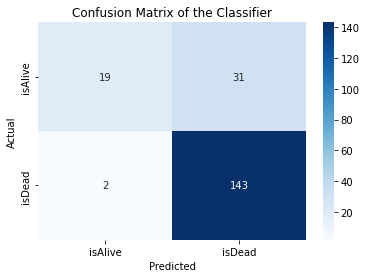

In [56]:
# calling the visual_cm function
visual_cm(true_y = y_test,
          pred_y = logreg_pred,
          labels = ['isAlive', 'isDead'])

# Part 5: Feature Importance

In [57]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [58]:
# INSTANTIATING a classification tree object
tree = DecisionTreeClassifier()


# FITTING the training data
tree_fit = tree.fit(x_train, y_train)


# PREDICTING on new data
tree_pred = tree_fit.predict(x_test)


# SCORING the model
print('Tree Training ACCURACY:', tree_fit.score(x_train,
                                                     y_train).round(4))

print('Tree Testing ACCURACY :', tree_fit.score(x_test,
                                                     y_test).round(4))

print('Tree AUC Score:', roc_auc_score(y_true  = y_test,
                                            y_score = tree_pred).round(4))


# saving scoring data for future use
tree_train_score = tree_fit.score(x_train, y_train).round(4) # accuracy
tree_test_score  = tree_fit.score(x_test, y_test).round(4)   # accuracy


# saving AUC
tree_auc_score   = roc_auc_score(y_true  = y_test,
                                      y_score = tree_pred).round(4) # auc

Tree Training ACCURACY: 0.96
Tree Testing ACCURACY : 0.8359
Tree AUC Score: 0.7979


In [59]:
# unpacking the confusion matrix
tree_tn, \
tree_fp, \
tree_fn, \
tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {tree_tn}
False Positives: {tree_fp}
False Negatives: {tree_fn}
True Positives : {tree_tp}
""")


True Negatives : 35
False Positives: 15
False Negatives: 18
True Positives : 127



In [60]:
# INSTANTIATING a classification tree object
tree_pruned = DecisionTreeClassifier(max_depth = 8,
                    min_samples_leaf = 25,
                    random_state = 219)


# FITTING the training data
tree_pruned_fit = tree_pruned.fit(x_train, y_train)


# PREDICTING on new data
tree_pruned_pred = tree_pruned_fit.predict(x_test)


# SCORING the model
print('Training ACCURACY:', tree_pruned_fit.score(x_train, y_train).round(4))
print('Testing  ACCURACY:', tree_pruned_fit.score(x_test, y_test).round(4))
print('AUC Score        :', roc_auc_score(y_true  = y_test,
                                          y_score = tree_pruned_pred).round(4))


# saving scoring data for future use
pruned_tree_train_score = tree_pruned_fit.score(x_train, y_train).round(4) # accuracy
pruned_tree_test_score  = tree_pruned_fit.score(x_test, y_test).round(4) # accuracy


# saving auc score
pruned_tree_auc_score   = roc_auc_score(y_true  = y_test,
                                        y_score = tree_pruned_pred).round(4) # auc

Training ACCURACY: 0.8281
Testing  ACCURACY: 0.8821
AUC Score        : 0.8093


In [61]:
# unpacking the confusion matrix
pruned_tree_tn, \
pruned_tree_fp, \
pruned_tree_fn, \
pruned_tree_tp = confusion_matrix(y_true = y_test, y_pred = full_tree_pred).ravel()


# printing each result one-by-one
print(f"""
True Negatives : {pruned_tree_tn}
False Positives: {pruned_tree_fp}
False Negatives: {pruned_tree_fn}
True Positives : {pruned_tree_tp}
""")


True Negatives : 35
False Positives: 15
False Negatives: 18
True Positives : 127



In [62]:
# comparing results
print(f"""
Model            AUC Score           TN, FP, FN, TP
-----            ---------           --------------
LogReg            {logreg_auc_score}            {logreg_tn, logreg_fp, logreg_fn, logreg_tp}
Tree              {tree_auc_score}*           {tree_tn, tree_fp, tree_fn, tree_tp}
Pruned Tree       {pruned_tree_auc_score}            {pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp}

*best model
""")  


# creating a dictionary for model results
model_performance = {

    
    'Model Name'    : ['Logistic', 'Full Tree', 'Pruned Tree'],
           
    'AUC Score' : [logreg_auc_score, full_tree_auc_score, pruned_tree_auc_score],
    
    'Training Accuracy' : [logreg_train_score, tree_train_score,
                           pruned_tree_train_score],
           
    'Testing Accuracy'  : [logreg_test_score, tree_test_score,
                           pruned_tree_test_score],

    'Confusion Matrix'  : [(logreg_tn, logreg_fp, logreg_fn, logreg_tp),
                           (full_tree_tn, full_tree_fp, full_tree_fn, full_tree_tp),
                           (pruned_tree_tn, pruned_tree_fp, pruned_tree_fn, pruned_tree_tp)]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)





Model            AUC Score           TN, FP, FN, TP
-----            ---------           --------------
LogReg            0.6831            (19, 31, 2, 143)
Tree              0.7979*           (35, 15, 18, 127)
Pruned Tree       0.8093            (35, 15, 18, 127)

*best model



The best model is the Tree using the second set of explanatory variable because of the AUC Score of 0.80 and among the model it did not result in a overfitting the training set. 